# 🤖 LLM Basics - Understanding Large Language Models

## Executive-Level Learning Session

**Duration:** 60-75 minutes  
**Level:** Executive/CVP (Non-technical but conceptually rigorous)  
**Goal:** Build intuition for how LLMs work, their capabilities, and limitations


## 0. Setup and Imports

We'll use minimal dependencies for this session - just visualization libraries and API access for demonstrations.

In [80]:
# Core libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Dict, Tuple
import warnings
import sys
import os
warnings.filterwarnings('ignore')
# Add auto-reload for external modules
%load_ext autoreload
%autoreload 2

# Import helpers module
sys.path.append(os.path.join(os.getcwd(), 'helpers'))
from helpers import llm_basics as helpers

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Setup complete! Ready to explore LLMs.")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
✅ Setup complete! Ready to explore LLMs.


---

## What is a Large Language Model?

Let's break down the name to understand what we're dealing with.

### 🔤 Breaking Down "Large Language Model"

**Large** = Billions of parameters (weights) - we'll explain this later  
**Language** = Trained on text data - we'll explain this later  
**Model** = Mathematical function that learns patterns - we'll explain this later  

At its core, an LLM is a **next-word prediction machine** that has learned patterns from massive amounts of text.

### 🎯 Core Mechanism: Predict the Next Word

This is the **fundamental concept** - everything else builds on this.

**Example:** Given "The sky is ____", what comes next?

The LLM looks at the probability of each possible next word based on patterns it learned from training data.

**Live Demo:** We'll use Azure OpenAI to get REAL probabilities from an actual LLM!

#### 🔧 Setup Instructions (Optional)

To see real predictions from Azure OpenAI:

1. **Copy `.env.example` to `.env`** in the repository root:
   ```bash
   cp .env.example .env
   ```

2. **Edit `.env` file** with your Azure OpenAI credentials:
   ```bash
   AZURE_OPENAI_API_KEY=your-api-key-here
   AZURE_OPENAI_ENDPOINT=https://your-resource.openai.azure.com/
   AZURE_OPENAI_DEPLOYMENT=gpt-4o
   ```

3. **Run the cell below** - it will automatically load credentials from `.env`

If not configured, the code will use simulated data for demonstration purposes.

✅ Successfully connected to Azure OpenAI!


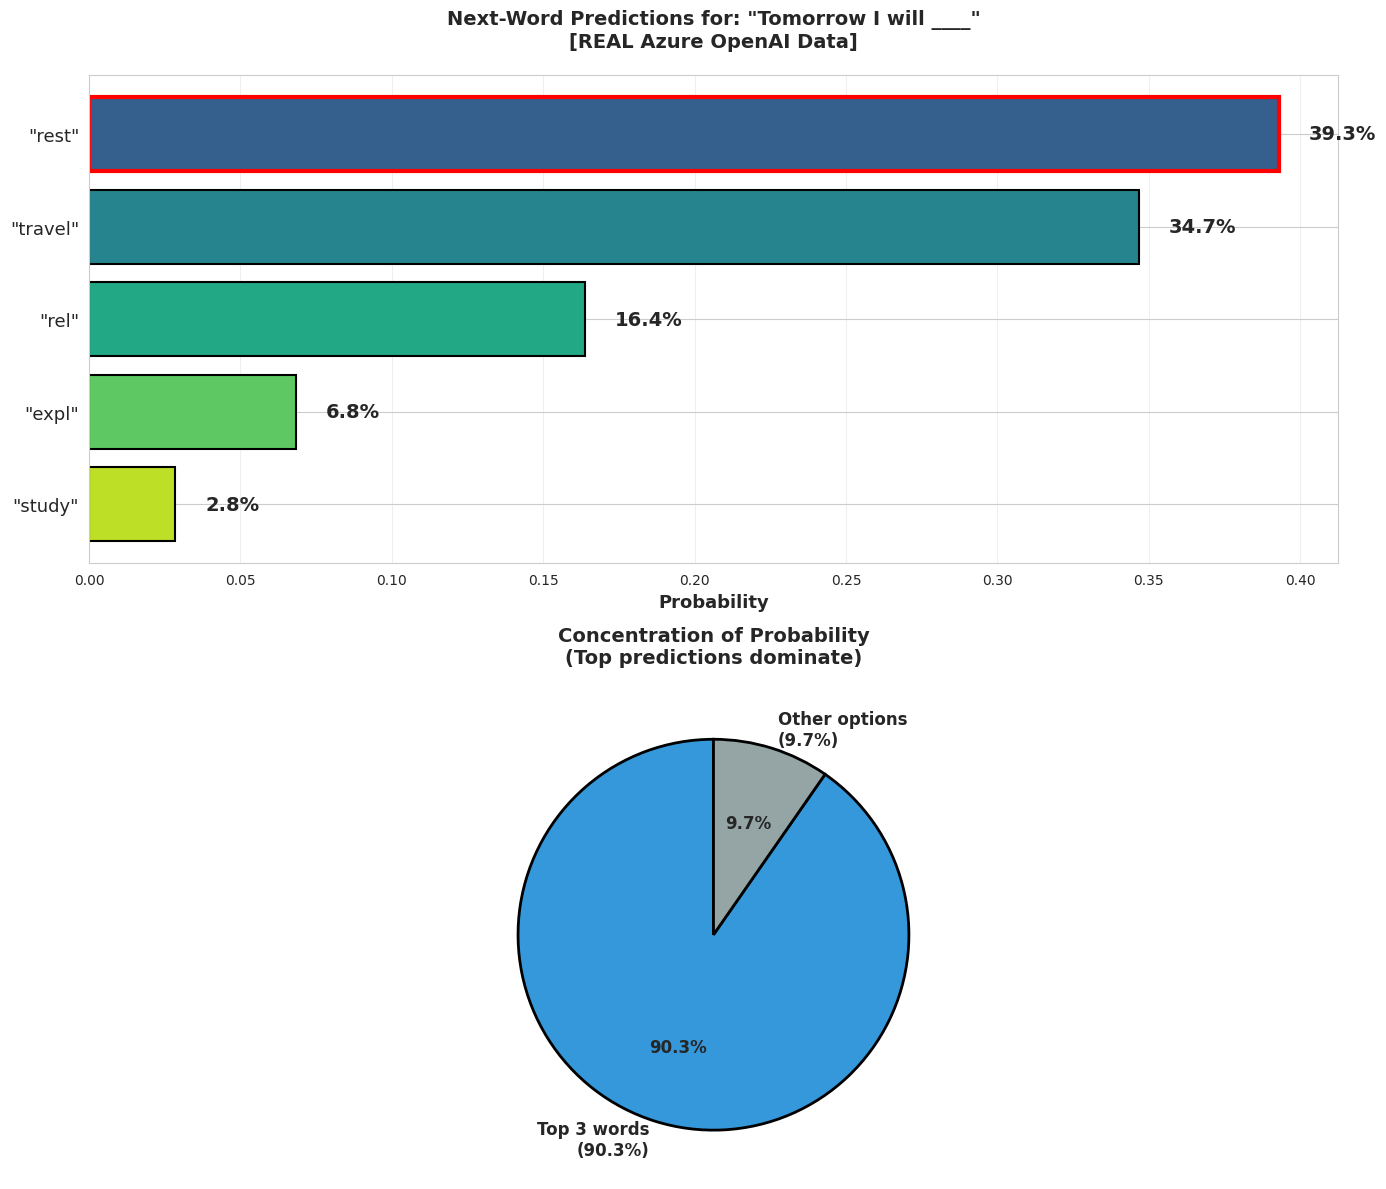


🎯 Next-Word Prediction Results:
   Prompt: 'Tomorrow I will ____'
   Most likely: 'rest' (39.3%)
   Runner-up: 'travel' (34.7%)
   Third: 'rel' (16.4%)

💡 Key Insights:
   - Top 3 predictions account for 90.3% of probability
   - LLM assigns different probabilities based on training data patterns
   - Model is confident (highest prob: 39.3%)
   - Temperature controls randomness in final selection


In [94]:
# Try different prompts to see varying probability distributions:
# - "The sky is" → Very predictable (blue, clear, cloudy)
# - "I feel" → More varied emotions/states
# - "The secret ingredient is" → Creative, many possibilities
# - "Tomorrow I will" → Open-ended actions
prompt = "Tomorrow I will"
# prompt = "The weather tomorrow is going to be"
# prompt = "If it rains today, the weather tomorrow is going to be"
# prompt = "If it's fall season and it rains today, the weather tomorrow is going to be"
helpers.visualize_real_next_word_predictions(prompt)

---

## How LLMs Generate Text

Understanding the generation process helps explain LLM behavior, costs, and limitations.

Play yourself -> [Temperature Visualizer](https://andreban.github.io/temperature-topk-visualizer/)

### 🎲 Temperature and Sampling: Controlling Creativity

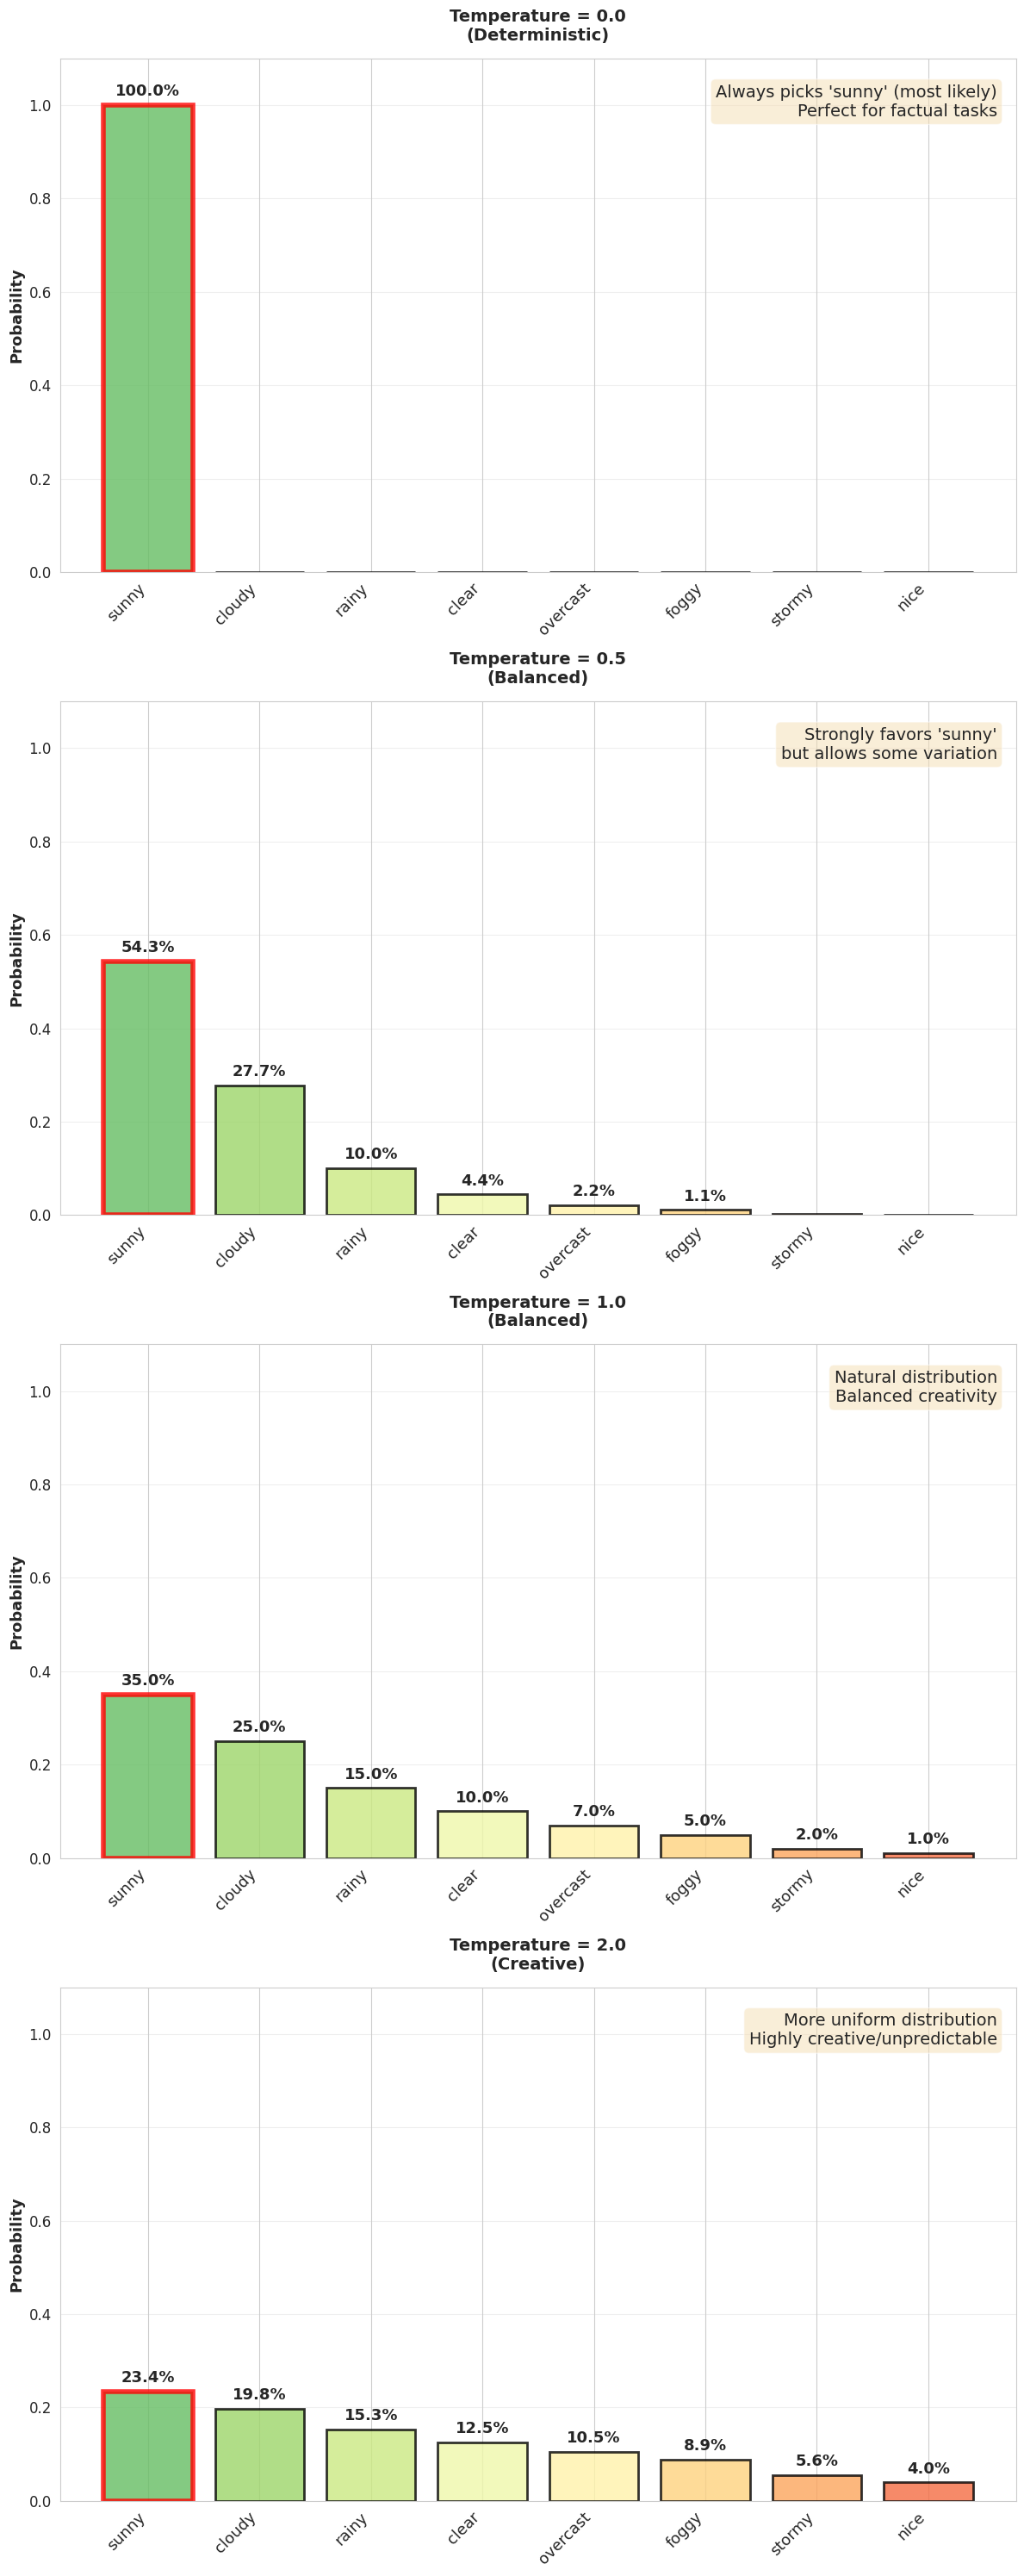


🎲 Temperature Parameter Explained:

🔵 Temperature = 0 (Deterministic)
   - Always picks the most likely token
   - Same input → Same output every time
   - Use cases: Code generation, data extraction, factual Q&A
   - Example: '2+2=' → always outputs '4'

🟢 Temperature = 0.5-0.7 (Focused)
   - Slightly randomized but coherent
   - Good for most production use cases
   - Use cases: Customer support, summaries, analysis

🟡 Temperature = 1.0 (Balanced)
   - Natural probability distribution
   - Good balance of creativity and coherence
   - Use cases: General conversation, writing assistance

🔴 Temperature = 1.5-2.0 (Creative)
   - Highly randomized, unpredictable
   - Can generate surprising/unusual outputs
   - Use cases: Creative writing, brainstorming, poetry
   - Risk: May lose coherence

💡 Business Implications:
   - Lower temperature = More reliable, predictable (better for automation)
   - Higher temperature = More creative, diverse (better for ideation)
   - Different use cases n

In [99]:
helpers.visualize_temperature_effects()

### 🔄 Word-by-Word Generation: The Autoregressive Process

LLMs generate text one word at a time, each depending on all previous words. This is why generation feels sequential and "thoughtful".

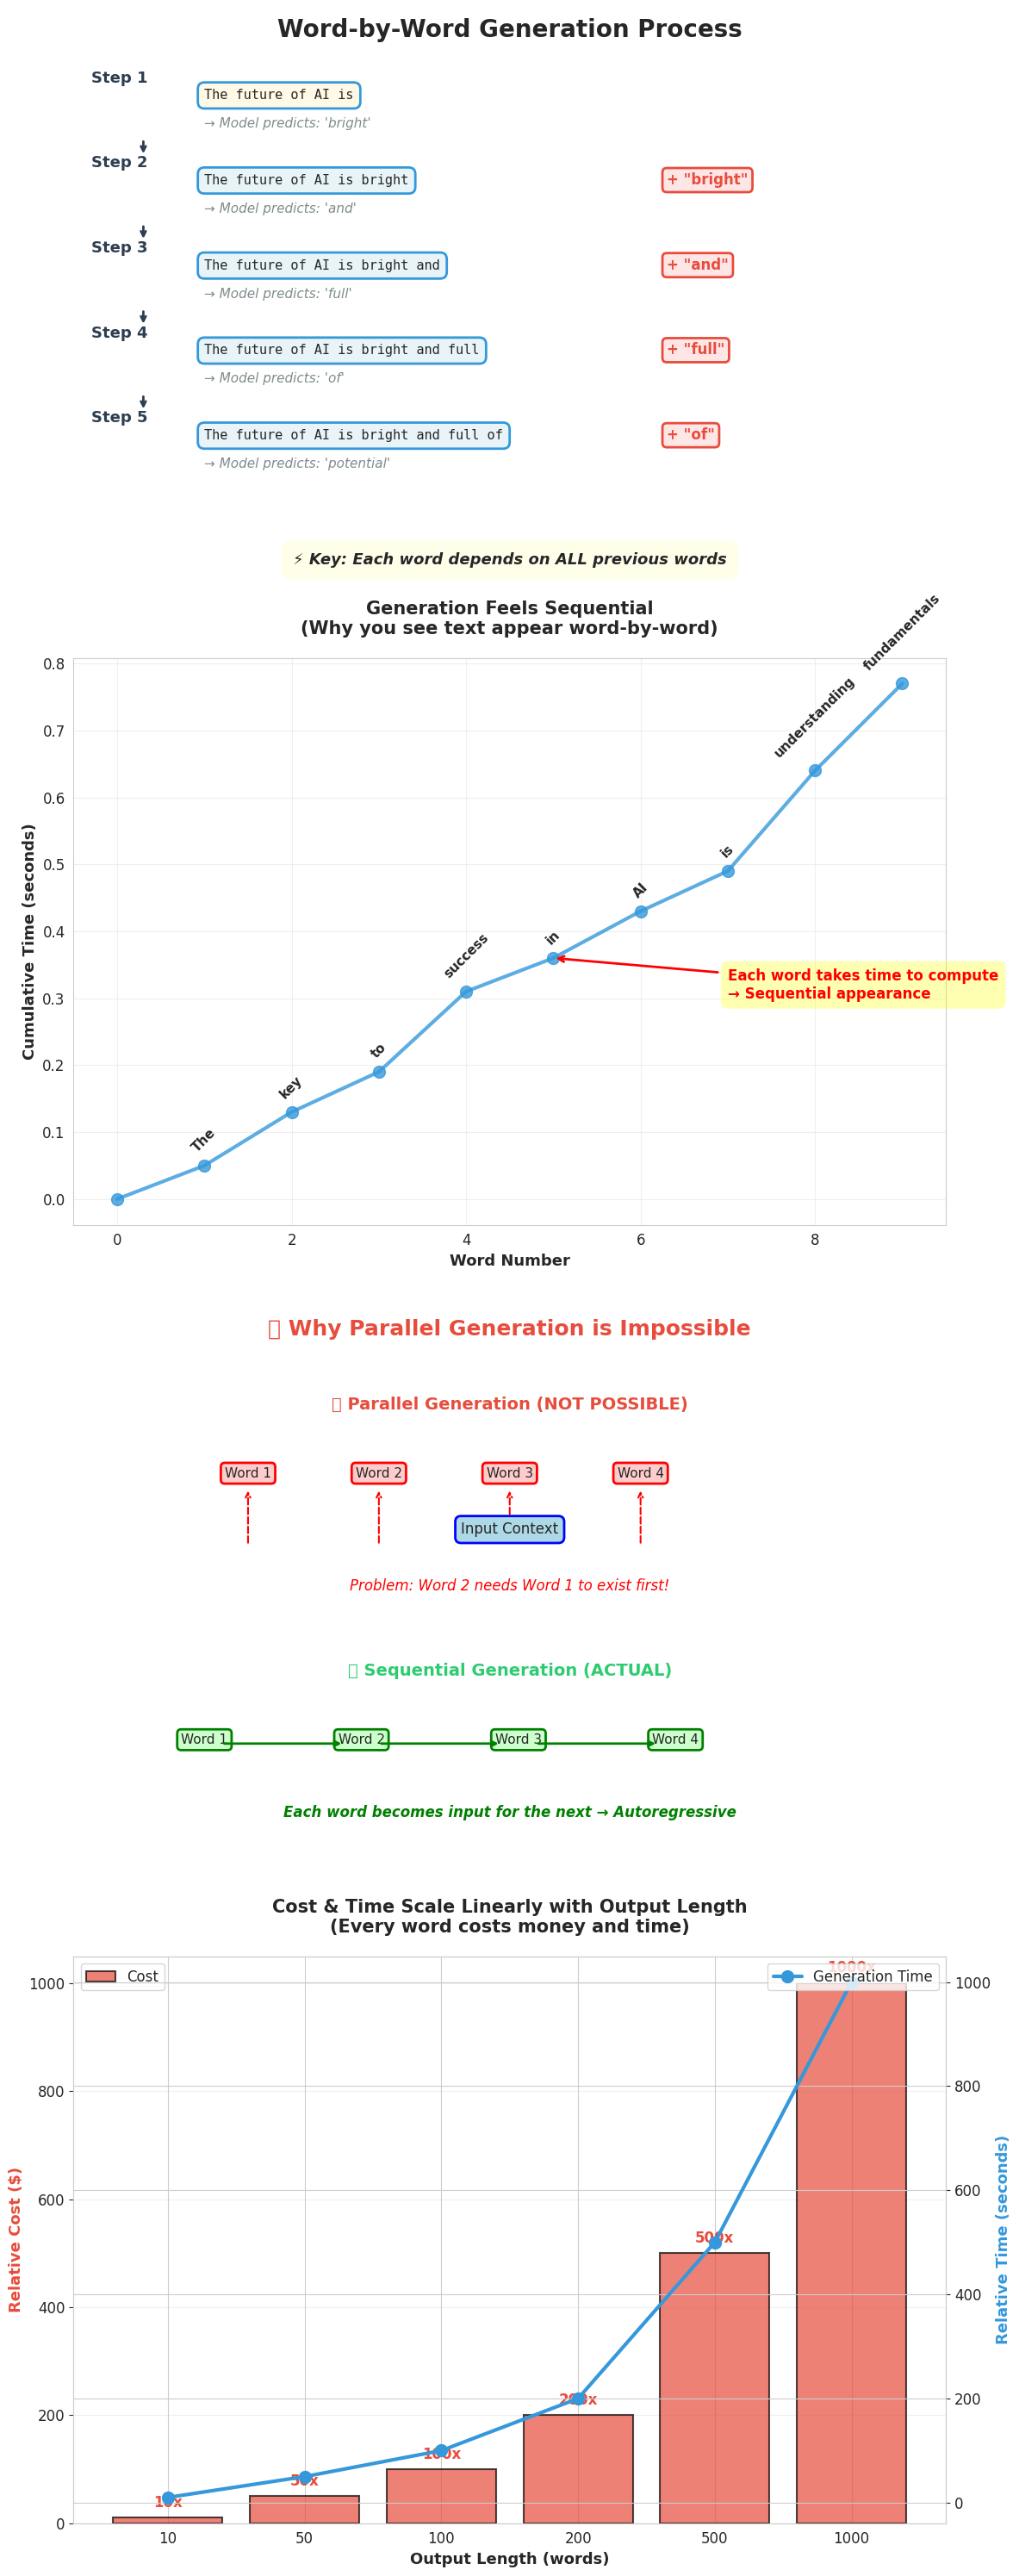


🔄 Word-by-Word Generation Explained:

📝 Autoregressive Process:
   1. Model reads your prompt
   2. Predicts most likely next word
   3. Adds that word to the context
   4. Predicts next word (considering ALL previous words)
   5. Repeats until done (stop word or max length)

⏱️ Why It Feels Like 'Thinking':
   - Each word takes ~50-200ms to generate
   - Appears sequentially, not all at once
   - Longer responses take proportionally longer
   - Gives impression of 'reasoning' or 'writing'
   - Reality: Pure prediction, no actual thinking

🚫 Why Parallel Generation is Impossible:
   - Word N depends on words 1 through N-1
   - Can't predict Word 3 without knowing Word 2
   - Must process sequentially (autoregressive)
   - This is fundamental to transformer architecture

💰 Cost Implications:
   - Every output word costs money
   - 1000-word output ≈ 100x more expensive than 10-word
   - Longer outputs = higher latency
   - Optimize: Be specific to get concise answers

⚡ Performance Imp

In [102]:
helpers.visualize_word_by_word()

#### 🎯 Practical Trivia: Order Matters in LLM-as-Judge Scenarios

Now that you understand that LLMs are Next Word Prediction machines and use sequential generation process (autoregressive), here's a **critical insight for real-world applications**:

**Question:** When using an LLM as a judge to evaluate some content and output structured JSON with both a score (1-5) and justification, which order produces better results and why?

.  

.  

**Prompt A: Score First Output**
```json
You are a text evaluator.
Your task is to evaluate how good the inputs are by providing a score (1-5) and justification.
Output a JSON structure like below:
{
  "score": 4,
  "justification": "The response is comprehensive..."
}
```

.  

.  

**Prompt B: Justification First Output**
```json
You are a text evaluator.
Your task is to evaluate how good the inputs are by providing a score (1-5) and justification.
Output a JSON structure like below:
{
  "justification": "The response is comprehensive...",
  "score": 4
}
```

.  
.  
.  
.  
.  
.  
.  
.  
.  
.  
.  
.  
.  

**Answer: Option B (Justification First) is SIGNIFICANTLY better!**

**Why?** Because of autoregressive generation:
- ❌ **Score First**: The model commits to a number (e.g., "4") before reasoning through the evaluation. It then writes justification that matches the already-committed score (confirmation bias).
- ✅ **Justification First**: The model reasons through the evaluation step-by-step, identifying strengths and weaknesses. When it finally generates the score, it has already "thought through" the full analysis.

**Real-World Impact:**
- Studies show **15-30% improvement in judgment quality** with justification-first ordering
- Microsoft's Azure AI Content Safety uses justification-first patterns
- OpenAI's GPT-4 technical report highlights this as a best practice

**The Pattern:**
```python
# ❌ BAD: Commits to answer before reasoning
"Provide your response in JSON: {score: 1-5, reasoning: string}"

# ✅ GOOD: Reasons before committing
"Provide your response in JSON: {reasoning: string, score: 1-5}"
```

**Takeaway:** When designing prompts for structured outputs, always put reasoning/justification fields **before** final decisions/scores. The sequential nature of LLMs means order matters!

### 🧠 Do LLMs Really "Think" or "Reason"?

This is one of the most debated questions in AI. Let's break down what's actually happening.

#### What It Looks Like vs. What's Actually Happening

**What You See:**
- LLM appears to "think through" problems
- Provides step-by-step reasoning
- Solves complex math, writes code, analyzes arguments
- Sometimes corrects itself mid-response

**What's Actually Happening:**
- Pure pattern matching at massive scale
- No internal "thought process" - just next-token prediction
- No consciousness, understanding, or awareness
- Each token is a statistical decision based on training data

#### The Illusion of Reasoning

**Example: Math Problem**

You ask: "If John has 5 apples and buys 3 more, how many does he have?"

**What it seems like:**
```
LLM "thinks": 
  1. John starts with 5
  2. He adds 3 more
  3. 5 + 3 = 8
  4. Answer: 8 apples
```

**What actually happens:**
```
Token 1: "If" → predict "John" (seen this pattern before)
Token 2: "has" → predict "5" (from "has 5 apples" pattern)
Token 3: "apples" → predict "and" (common continuation)
...continues predicting most likely next token...
Eventually: "5 + 3 = 8" (memorized arithmetic pattern)
Final: "8 apples" (completes the pattern)
```

#### Chain-of-Thought (CoT): Why Step-by-Step Helps

**Discovery:** Models perform MUCH better when asked to "show your work"

**Example without CoT:**
```
Q: "Roger has 5 tennis balls. He buys 2 more cans of tennis balls. 
    Each can has 3 balls. How many tennis balls does he have now?"
A: "11 balls" ❌ (Often wrong!)
```

**Example with CoT:**
```
Q: "Roger has 5 tennis balls. He buys 2 more cans of tennis balls. 
    Each can has 3 balls. How many tennis balls does he have now?
    Let's think step by step."
    
A: "Let's solve this step by step:
    1. Roger starts with 5 tennis balls
    2. He buys 2 cans
    3. Each can has 3 balls, so 2 × 3 = 6 balls
    4. Total: 5 + 6 = 11 balls" ✅ (Much more accurate!)
```

**Why does CoT work?**
- NOT because the model "thinks better"
- Because longer sequences allow more pattern matching
- Intermediate steps create "reasoning paths" the model has seen during training
- More tokens = more opportunities to adjust toward correct answer
- The autoregressive nature means each step builds on previous context

#### Emergent Abilities: The Scale Surprise

**Fascinating Discovery:** Some abilities ONLY appear at large scale

**Small Models (< 10B parameters):**
- ❌ Can't do multi-step reasoning
- ❌ Poor at following complex instructions
- ❌ Limited mathematical ability

**Large Models (100B+ parameters):**
- ✅ Can solve complex multi-step problems
- ✅ Follow nuanced instructions
- ✅ Perform calculations with high accuracy
- ✅ Display "common sense" reasoning

**Key Insight:** These weren't explicitly trained - they **emerged** from scale!

#### Important Limitations

**What LLMs CANNOT do (fundamentally):**

1. **True Understanding** - No semantic comprehension, just pattern matching
2. **Causal Reasoning** - Can't truly understand cause and effect
3. **Physical Intuition** - No understanding of how the world actually works
4. **Reliable Arithmetic** - Still makes calculation errors (it's not a calculator!)
5. **Self-Awareness** - No consciousness or awareness of being an AI
6. **Learning from Conversation** - Each response is independent; no memory across sessions
7. **Planning Ahead** - Can't plan future tokens; only predicts next token

**Real-World Example of Failure:**
```
Q: "How many times does the letter 'r' appear in 'strawberry'?"
A: "The letter 'r' appears 2 times in 'strawberry'" ❌ WRONG! (It's 3)
```

**Why?** Because tokenization splits "strawberry" into subword tokens, not individual letters!
The model never "sees" the word as separate letters - it's a statistical pattern.

#### The Bottom Line for Executives

**Think of LLMs as:**
- 🎯 **Incredibly sophisticated pattern matching engines**
- 🎯 **Statistical models that predict plausible continuations**
- 🎯 **Tools that simulate reasoning without actual understanding**

**NOT as:**
- ❌ Thinking machines
- ❌ Intelligent beings
- ❌ Systems that "understand" what they're saying
- ❌ Infallible reasoning engines

**Practical Implications:**
- ✅ Excellent for tasks with clear patterns in training data
- ✅ Great for generating human-like text
- ✅ Useful for brainstorming and ideation
- ⚠️ Require validation for critical decisions
- ⚠️ Can confidently state incorrect information
- ⚠️ Need human oversight for important applications

**The Paradox:** LLMs can appear more "intelligent" than they are because they've memorized so much human knowledge - but that's different from actual reasoning or understanding.

### 🔢 From Words to Numbers: Tokenization

LLMs can't work with text directly - they need numbers. This process is called **tokenization**.

Check yourself -> [GPT Tokenizer](https://platform.openai.com/tokenizer)

**Key Concept:** Text → Tokens → Numbers → Model Processing

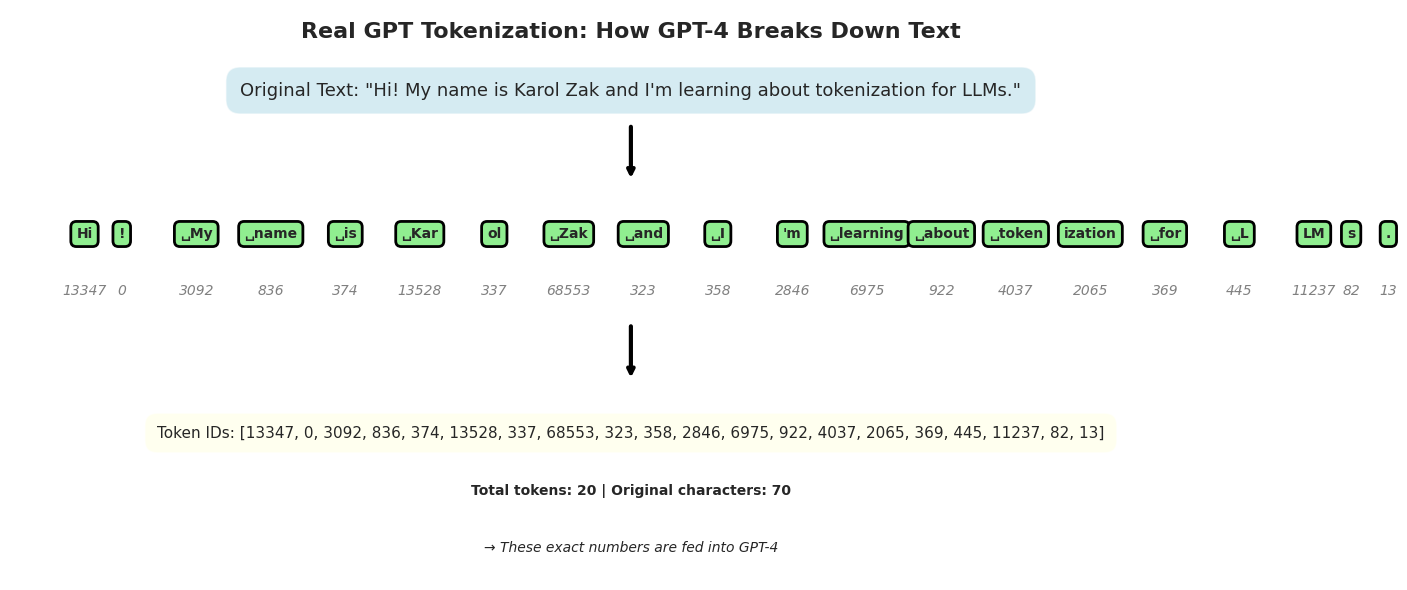


🔍 Real GPT-4 Tokenization Results:
   Original text: 'Hi! My name is Karol Zak and I'm learning about tokenization for LLMs.'
   Number of tokens: 20
   Tokens: ['Hi', '!', ' My', ' name', ' is', ' Kar', 'ol', ' Zak', ' and', ' I', "'m", ' learning', ' about', ' token', 'ization', ' for', ' L', 'LM', 's', '.']
   Token IDs: [13347, 0, 3092, 836, 374, 13528, 337, 68553, 323, 358, 2846, 6975, 922, 4037, 2065, 369, 445, 11237, 82, 13]


In [84]:
text_example = "Strawberry has three r's"
text_example = "Hi! My name is Karol Zak and I'm learning about tokenization for LLMs."
helpers.visualize_real_tokenization(text_example)

### 📚 Vocabulary Size: The Token Dictionary

Every LLM has a fixed **vocabulary** - a dictionary mapping tokens to numbers. Understanding vocabulary size is crucial for grasping LLM architecture and limitations.

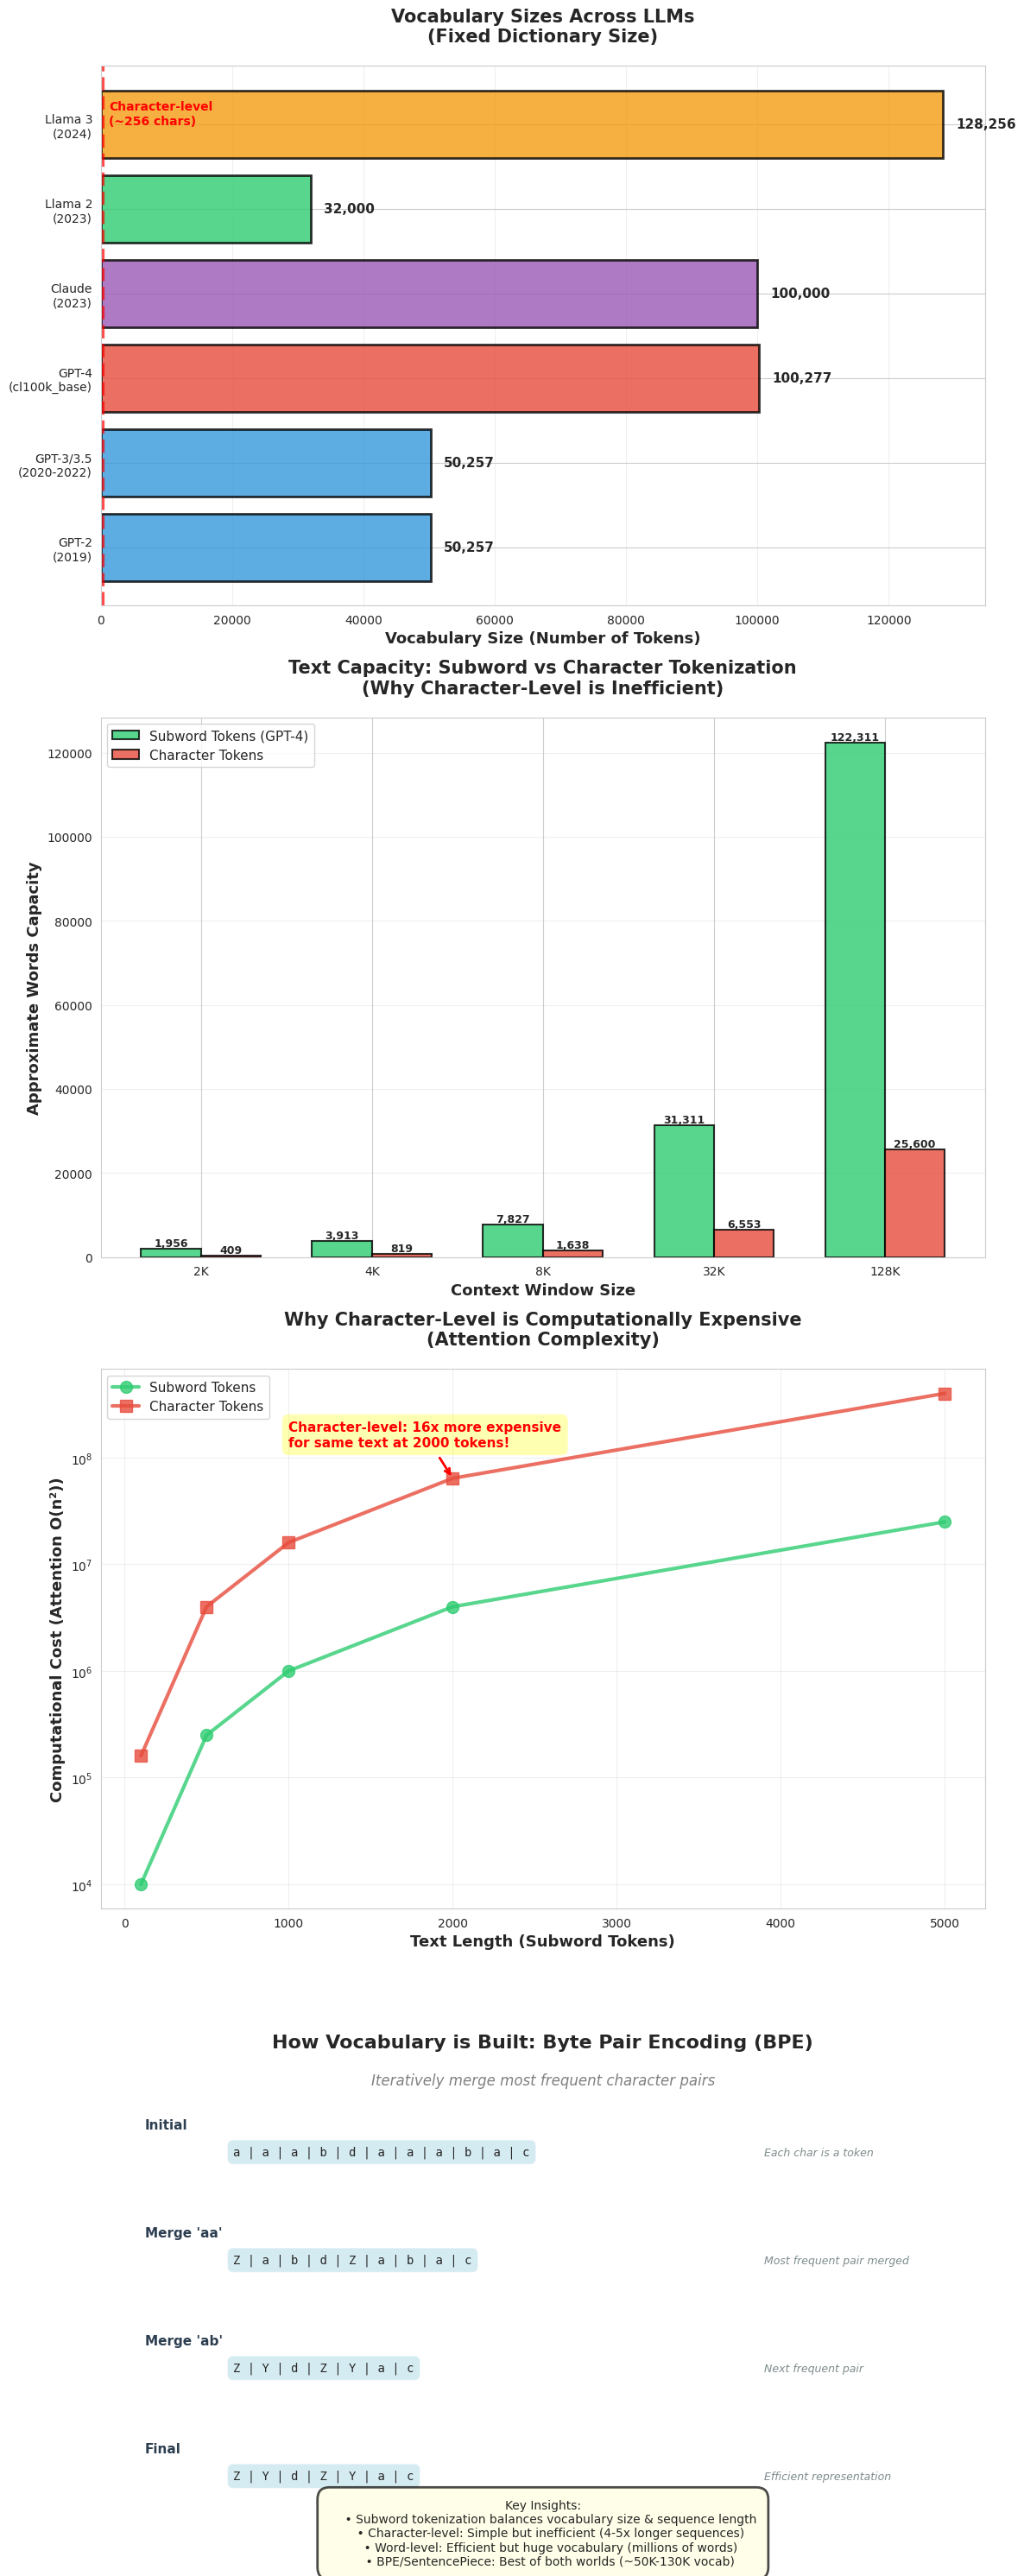


📊 Vocabulary Analysis:
   Example: 'The quick brown fox jumps over the lazy dog'
   - Character tokens: 43
   - GPT-4 subword tokens: 9
   - Compression ratio: 4.8x

🎯 Why Not Character-Level Tokenization?
   1. Sequence Length: 4-5x longer for same text
   2. Computational Cost: O(n²) attention → 16x more expensive
   3. Context Window: Wastes precious context on characters, not meaning
   4. Training Time: Longer sequences = slower training

💡 Why Subword Tokenization Wins:
   ✓ Balanced vocabulary size (50K-130K tokens)
   ✓ Efficient sequence length (~4x shorter than characters)
   ✓ Handles rare words via subword units
   ✓ Language-agnostic (works across all languages)
   ✓ Optimal for attention mechanisms

🔧 Popular Tokenization Methods:
   - BPE (Byte Pair Encoding): GPT models
   - SentencePiece: Llama, PaLM models
   - WordPiece: BERT


In [85]:
helpers.compare_vocab_sizes()

### 🔢 What Are Parameters/Weights? The Mathematical Heart of LLMs

Before we look at scale, let's understand the **fundamental concept**: 

**An LLM is a massive mathematical function** with billions of learned numbers (parameters/weights) that transform text into predictions.

Let's visualize this with a concrete NLP example: **predicting the next word**.

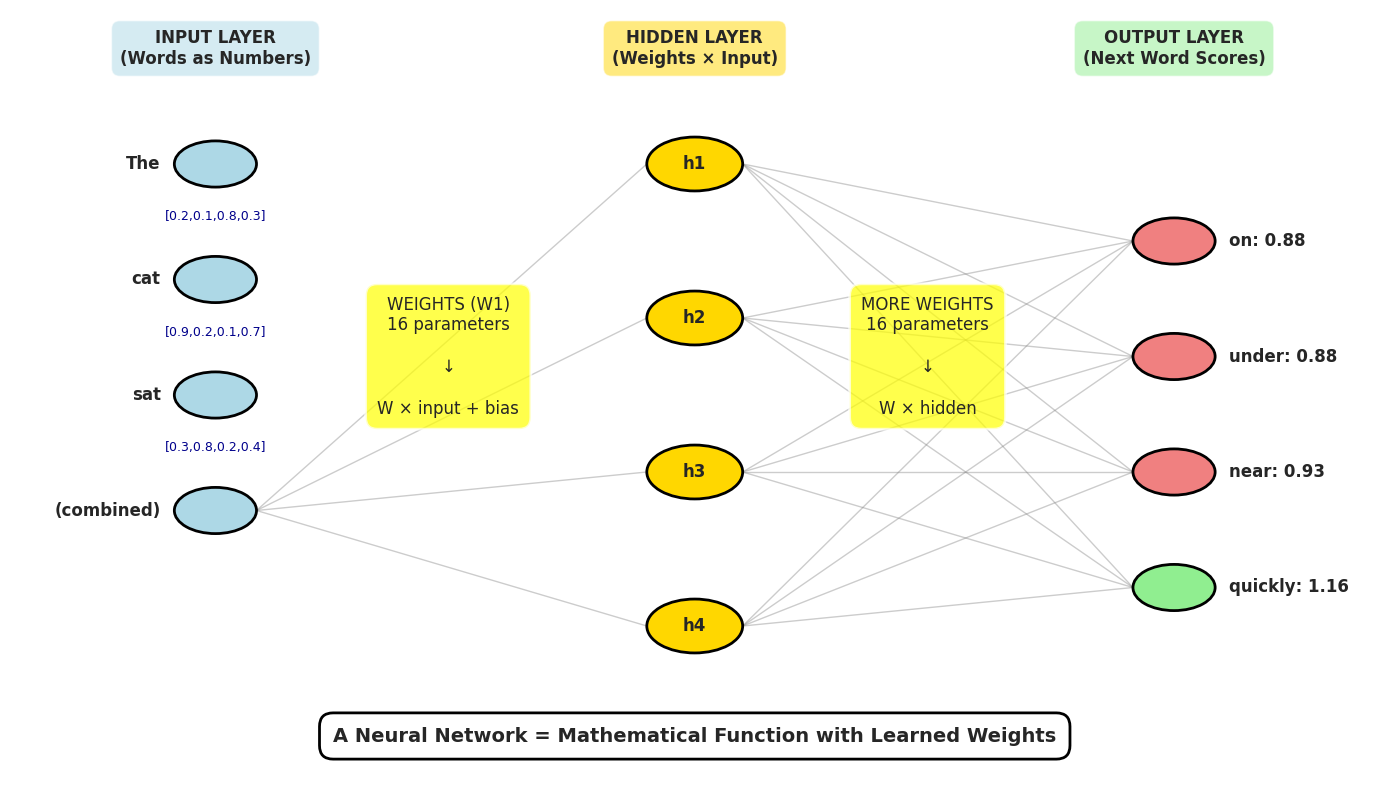


🧠 THE CORE CONCEPT:
This toy network has: 4 inputs × 4 hidden + 4 hidden × 4 outputs
                      = 16 + 16 + 8 bias = 40 parameters total

A real LLM like GPT-4:
  • Has 100+ layers (not just 2)
  • Each layer has millions of connections
  • Total: ~1,760,000,000,000 parameters

But the PRINCIPLE is exactly the same:
  Text → Numbers → Weights × Numbers → More Numbers → Prediction

🎯 The 'magic' is in the WEIGHTS, learned from massive data!


In [86]:
helpers.model_weights_visualization()

### 📊 Visualization: The Scale of "Large"

Let's visualize what "large" really means when we talk about modern LLMs.

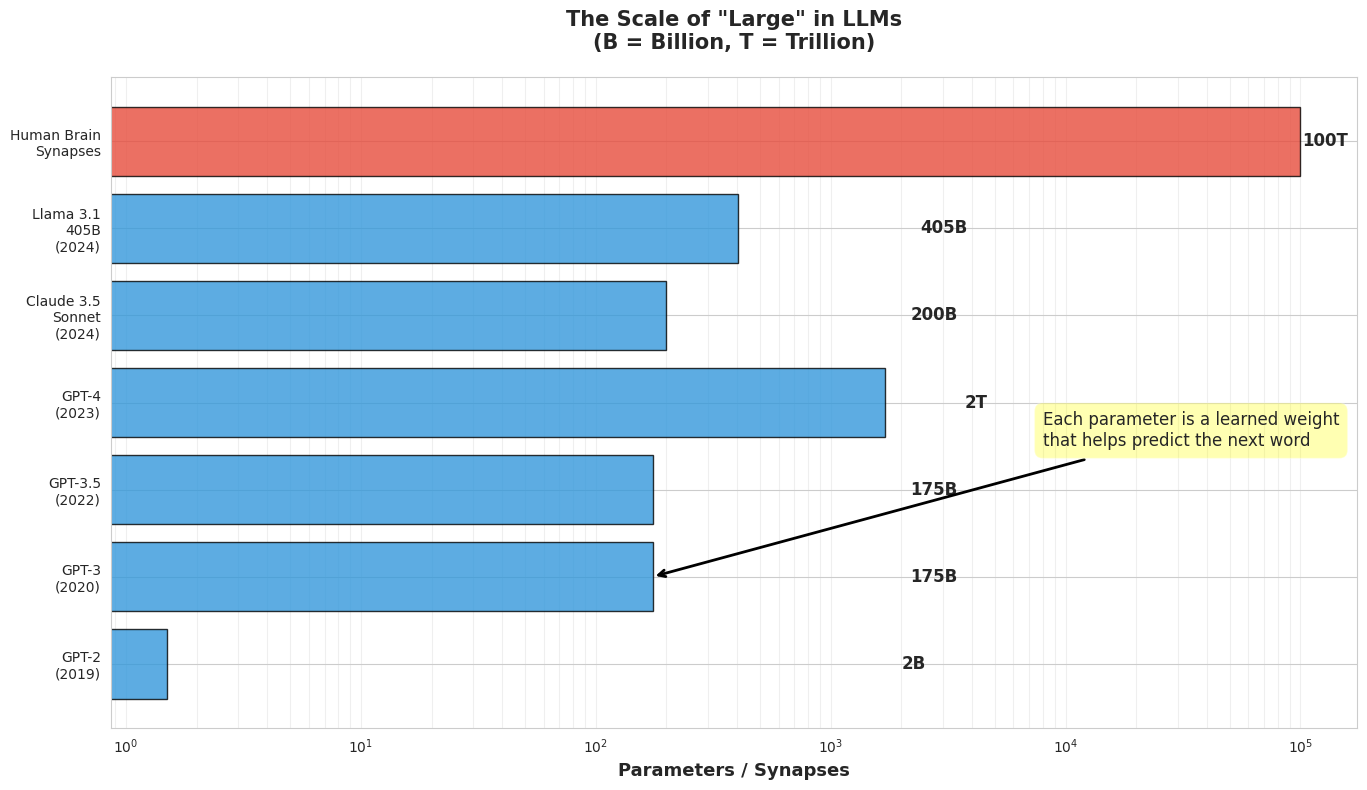


💡 Key Insight:
   - Modern LLMs have 100+ billion parameters
   - Each parameter is a number the model learned during training
   - More parameters = more capacity to learn patterns (but diminishing returns)
   - GPT-4 estimated to have ~1.7 trillion parameters (not confirmed)
   - Still orders of magnitude less than human brain synapses!


In [87]:
helpers.model_scale_comparison()

### 💾 Memory Requirements: Why Scale Matters

Understanding model size in memory helps explain why running LLMs requires massive GPU infrastructure.

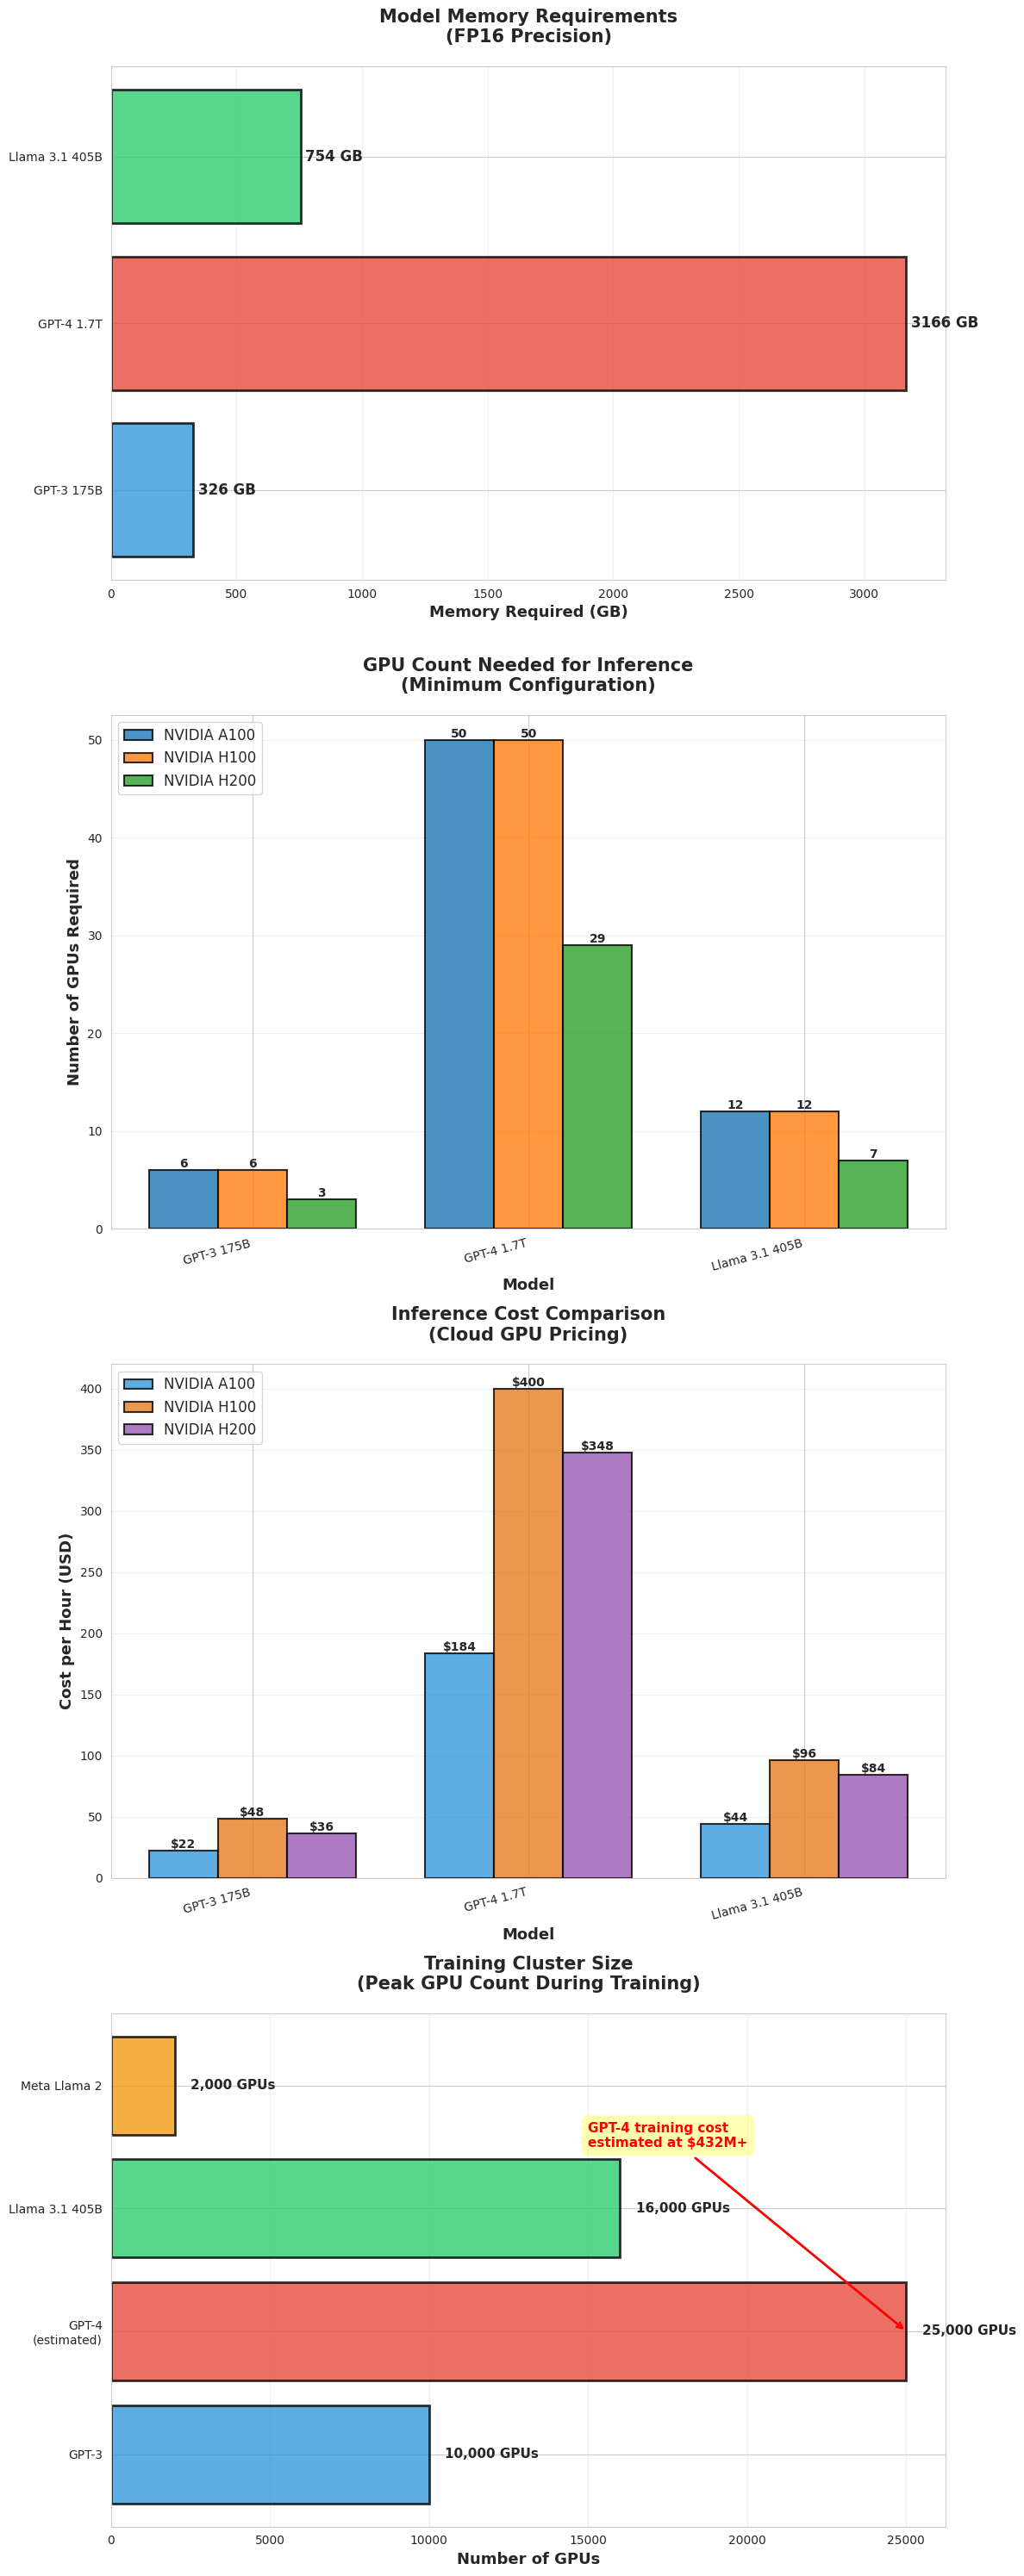


💰 Key Cost Insights:
   - GPT-3 (175B): ~326 GB memory
   - Minimum 6 x H100 GPUs needed for inference
   - Inference cost: ~$48/hour on H100s

   - GPT-4 (1.7T): ~3166 GB memory
   - Minimum 50 x H100 GPUs needed
   - Training required ~25,000 GPUs for months

⚡ Why This Matters:
   - Each API call runs on multi-GPU clusters
   - Operating at scale requires data center infrastructure
   - Cloud costs can reach millions per month for popular services
   - Smaller models (7B-70B) can run on single GPUs → edge deployment possible


In [88]:
helpers.calc_memory_and_costs()

### 📚 Training Data: What LLMs Learn From

Modern LLMs are trained on massive amounts of text data from diverse sources.

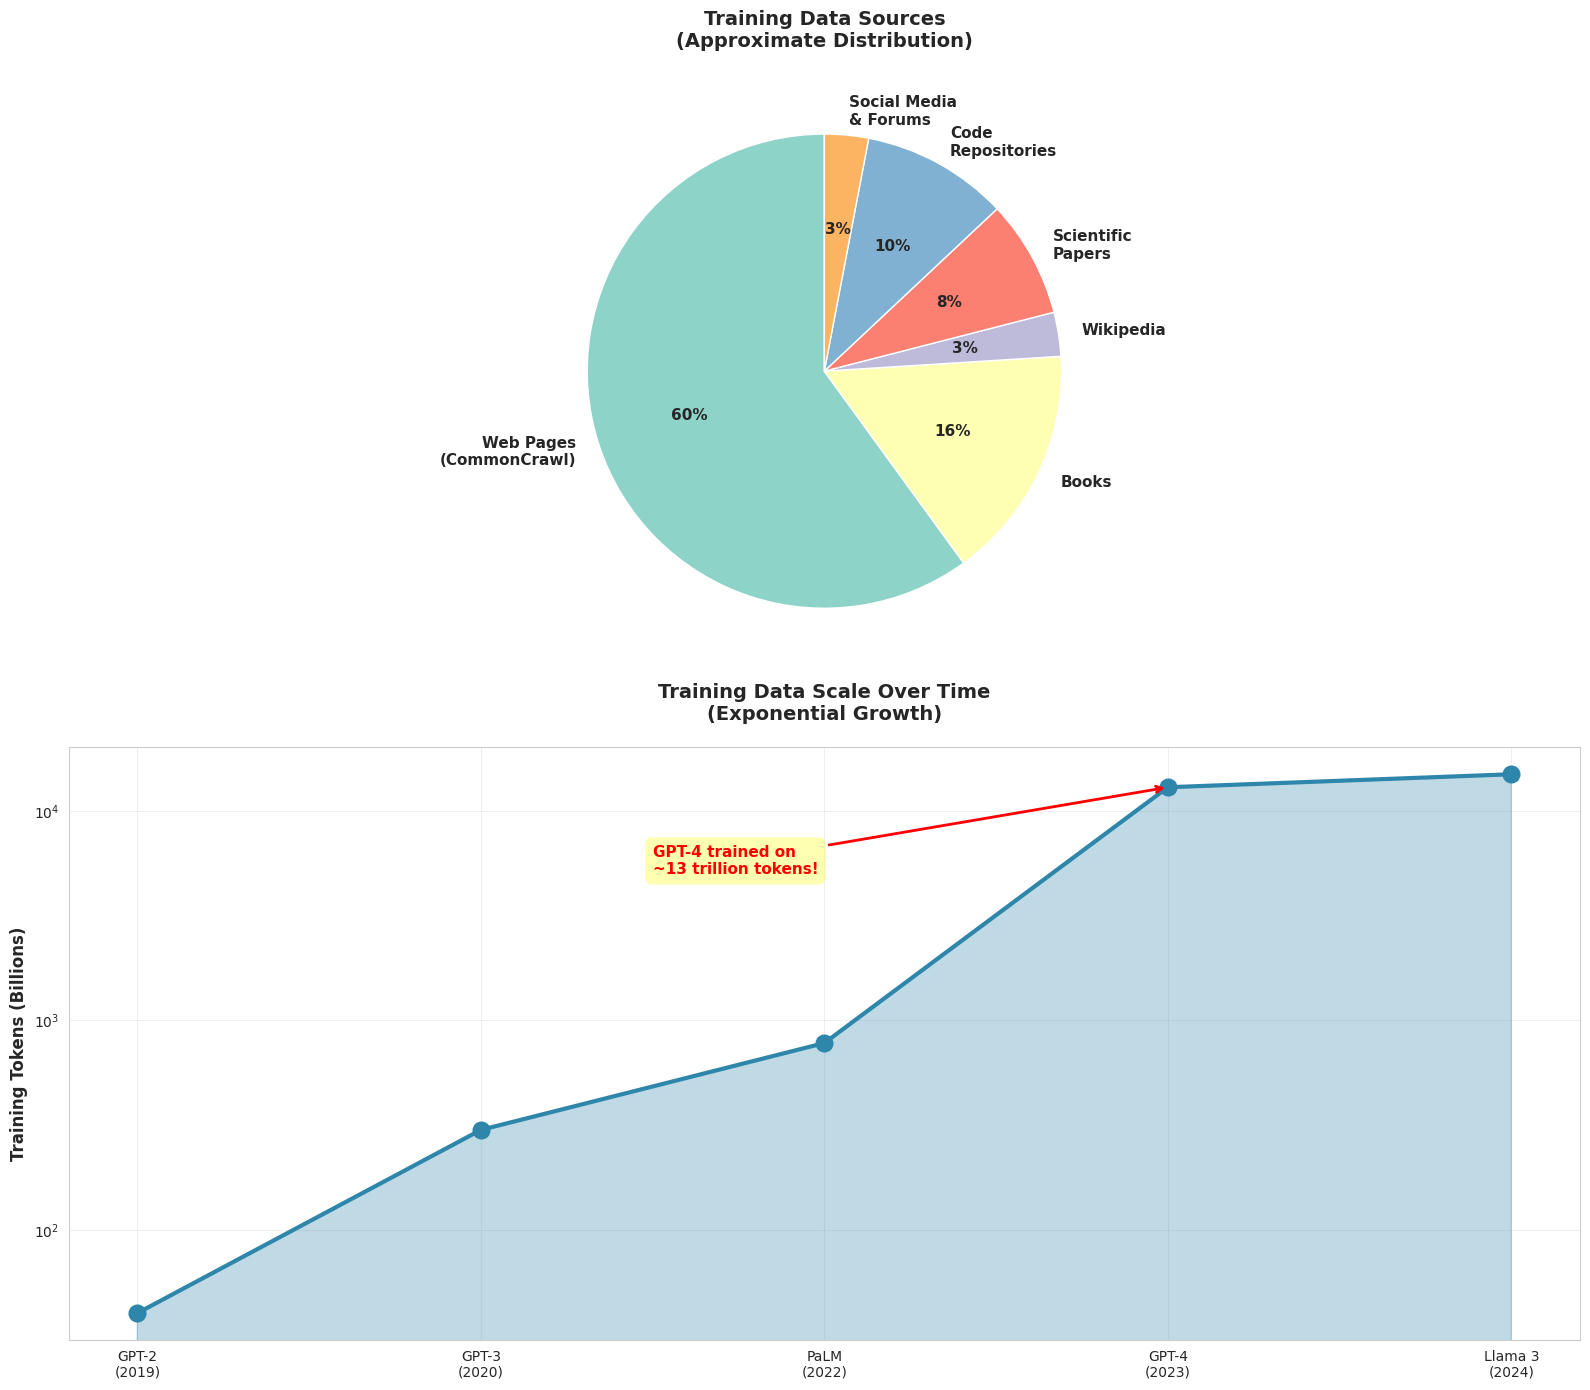


📊 Training Data Facts:
   - GPT-3: ~500 billion tokens (~1 million books equivalent)
   - GPT-4: ~13 trillion tokens (estimated)
   - Cost: $10M - $100M+ just for compute
   - Time: Months of training on thousands of GPUs

⚠️  Critical Insight:
   - Quality of training data = Quality of model behavior
   - Biases in data → Biases in model
   - Cutoff date means no knowledge of events after training


In [89]:
helpers.visualize_training_data()

---



## 🏗️ The Training Pipeline

LLMs go through multiple training phases, each serving a different purpose.

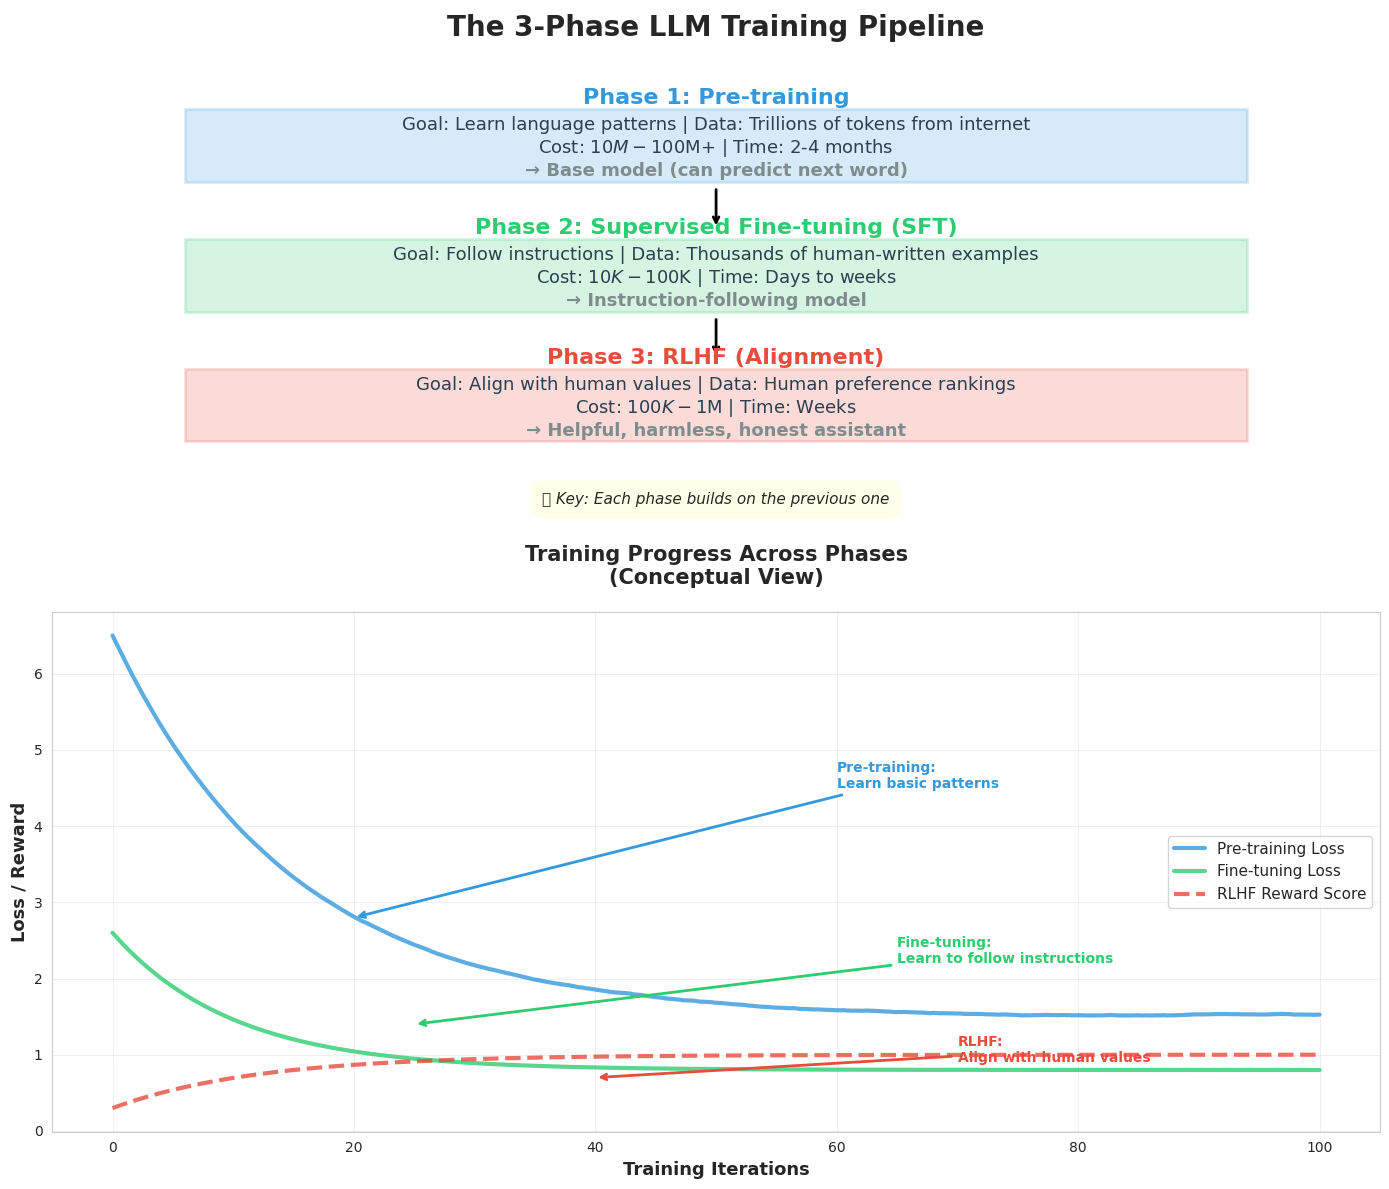


🎓 Training Pipeline Explained:

📘 Phase 1: Pre-training (The Foundation)
   - Model reads trillions of words from the internet
   - Learns to predict the next word in any context
   - Acquires world knowledge, grammar, facts, reasoning patterns
   - Result: A 'base model' that can complete text
   - Example: GPT-4 base (before instruction tuning)

📗 Phase 2: Supervised Fine-tuning (SFT)
   - Humans write examples of good assistant behavior
   - Model learns to respond to instructions
   - Thousands of high-quality examples (not billions)
   - Result: Model follows instructions reliably
   - Example: Can answer 'Write a poem about AI'

📕 Phase 3: RLHF (Reinforcement Learning from Human Feedback)
   - Humans rank multiple model outputs (A vs B)
   - Model learns what humans prefer
   - Teaches helpfulness, harmlessness, honesty
   - Result: ChatGPT-like behavior
   - Example: Politely declines harmful requests

💰 Cost Implications:
   - Pre-training: 95%+ of total cost
   - Fine-tuning:

In [90]:
helpers.visualize_training_pipeline()